# Разработка решения, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Цель исследования:** 
Разработка решения, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность. 

**Описание проекта:**  Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

**Описание данных:**

1. Файл market_file.csv ссодержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении:
2. Файл market_money.csv содержит данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом:
3. Файл market_time.csv содержит данные о времени (в минутах), которое покупатель провёл на сайте в течение периода:
4. Файл money.csv содержит данные о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю:

Решать задачу вам нужно в два этапа:

1.	Разработать модель, которая предскажет вероятность снижения покупательской активности.
2.	Выделить сегмент покупателей, проанализировать его и предложить, как увеличить его покупательскую активность.

**Ход исследования:**
* Шаг 1. Подготовка данных: загрузка и изучений общей информации о полученном датасете;
* Шаг 2. Предобработка данных: приведение к верному типу данных, добавление новых столбцов, обработка пропущенных значений, дубликатов и аномалий;
* Шаг 3. Исследовательский анализ данных
* Шаг 4. Объединение таблиц;
* Шаг 5. Корреляционный анализ;
* Шаг 6. Использование пайплайнов;
* Шаг 7. Анализ важности признаков;
* Шаг 8. Сегментация покупателей;

**Общий вывод:** резюмирование полученных результатов, формулировка ключевых выводов и рекомендаций.

## Загрузка данных

### Импортируем библиотеки

In [1]:
!pip install numpy

In [2]:
!pip install -U scikit-learn

In [3]:
#!pip install phik

In [4]:
!pip install -U shap matplotlib

In [5]:
!pip install matplotlib

In [6]:
!pip install -U seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 653.6 kB/s eta 0:00:01
   ---------------- ----------------------- 122.9/294.9 kB 1.2 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.16.1 requires matplotlib<=3.10,>=3.5, but you have matplotlib 3.10.3 which is incompatible.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV
import shap
from sklearn.metrics import recall_score
from sklearn.dummy import DummyClassifier

In [2]:
RANDOM_STATE = 42

### Считываем данные из файлов

In [3]:
market_main = pd.read_csv('market_file.csv', sep=',', decimal=',')

In [4]:
market_money = pd.read_csv('market_money.csv', sep=',', decimal=',')

In [5]:
market_time = pd.read_csv('market_time.csv', sep=',', decimal=',')

In [6]:
money = pd.read_csv('money.csv', sep=';', decimal=',')

### Изучим данные: выведем статистику по каждому датасету и описание

In [7]:
def data_characteristics(df):
    return display(df.head(10), df.info())

In [8]:
data_characteristics(market_main)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   id                                   1300 non-null   int64 
 1   Покупательская активность            1300 non-null   object
 2   Тип сервиса                          1300 non-null   object
 3   Разрешить сообщать                   1300 non-null   object
 4   Маркет_актив_6_мес                   1300 non-null   object
 5   Маркет_актив_тек_мес                 1300 non-null   int64 
 6   Длительность                         1300 non-null   int64 
 7   Акционные_покупки                    1300 non-null   object
 8   Популярная_категория                 1300 non-null   object
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64 
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64 
 11  Ошибка_сервиса                       1300 n

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандартт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
6,215354,Снизилась,стандартт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2
7,215355,Снизилась,стандартт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4
8,215356,Снизилась,стандартт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3
9,215357,Снизилась,стандартт,да,3.9,5,154,0.0,Техника для красоты и здоровья,3,3,9,5


None

**Вывод:** В датасете 1300 строки и 13 столбцов. В столбцах `Маркет_актив_6_мес`, `Акционные_покупки` необходимо поменять типы данных на float64, в столбце `Маркет_актив_тек_мес` на int64. Пропусков нет. Значение "стандартт" в столбце `Тип сервиса` необходимо поменять на "стандарт".

In [9]:
data_characteristics(market_money)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       3900 non-null   int64 
 1   Период   3900 non-null   object
 2   Выручка  3900 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.5+ KB


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
8,215350,предыдущий_месяц,5457.5
9,215351,текущий_месяц,6610.4


None

**Вывод:** В датасете 3900 строк и 3 столбца. В столбцах `Выручка` необходимо поменять тип данных на float64. Пропусков нет. 

In [10]:
data_characteristics(market_time)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдцщий_месяц,8
6,215351,текущий_месяц,13
7,215351,предыдцщий_месяц,11
8,215352,текущий_месяц,11
9,215352,предыдцщий_месяц,8


None

**Вывод:** В датасете 2600 строк и 3 столбца.  Пропусков нет. Значение "предыдцщий_месяц" в столбце `Период` необходимо поменять на "предыдущий_месяц".

In [11]:
data_characteristics(money)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
5,215353,3.95
6,215354,3.62
7,215355,5.26
8,215356,4.93
9,215357,4.66


None

**Вывод:** В датасете 1300 строк и 2 столбца.  Пропусков нет.

Данные соответствуют описанию. Перейдем к предобработке данных.

##  Предобработка данных

### Исправим синтаксические ошибки в данных

In [12]:
market_main['Тип сервиса'].replace('стандартт', 'стандарт', inplace=True)

In [13]:
market_time['Период'].replace('предыдцщий_месяц', 'предыдущий_месяц', inplace=True)

### Преобразуем данные в нужные типы

In [14]:
market_main[['Маркет_актив_6_мес', 'Акционные_покупки']] = market_main[['Маркет_актив_6_мес', 'Акционные_покупки']].astype('float64')

In [15]:
market_main['Маркет_актив_тек_мес'] = market_main['Маркет_актив_тек_мес'].astype('int64')

In [16]:
market_money['Выручка'] = market_money['Выручка'].astype('float64')

### Обработаем дубликаты

#### Посмотрим, есть ли явные дубликаты и удалим их при наличии

Так как в каждом датасете есть id клиента, явные дубликаты необходимо удалить

In [17]:
def explicit_duplicates(df):
    if df.duplicated().sum() > 0:
        df = df.drop_duplicates()

In [18]:
explicit_duplicates(market_main)

In [19]:
explicit_duplicates(market_money)

In [20]:
explicit_duplicates(market_time)

In [21]:
explicit_duplicates(money)

#### Посмотрим, есть ли неявные дубликаты и удалим их при наличии

In [22]:
market_main['Покупательская активность'].unique()

array(['Снизилась', 'Прежний уровень'], dtype=object)

In [23]:
market_main['Тип сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [24]:
market_main['Разрешить сообщать'].unique()

array(['да', 'нет'], dtype=object)

In [25]:
market_main['Популярная_категория'].unique()

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

In [26]:
market_money['Период'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

In [27]:
market_time['Период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

Явных дубликатов нет.

### Обработаем аномальные значения

In [28]:
market_main.describe()

,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


In [29]:
market_money.describe()

,id,Выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


In [30]:
market_time.describe()

,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


In [31]:
money.describe()

,id,Прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


Аномалий нет

### Вывод

Я выполнила преобработку данных:
* привели типы данных к нужным типам;
* обработала дубликаты;

Аномальных значений и пропусков и явных дубликатов в данных не обнаружено.

Можно приступать к исследовательскому анализу данных.

##  Исследовательский анализ данных

Покупательская активность является целевым признаком. Посмотрим, как распределены категории в тренировочных данных, возможно, присутствует дисбаланс классов.

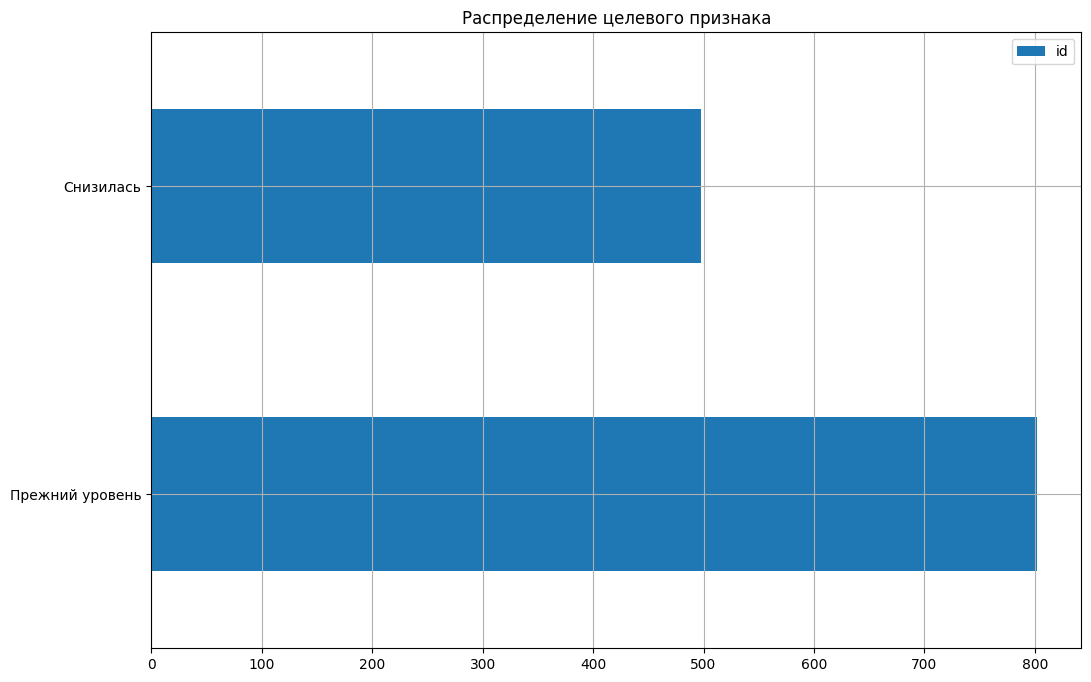

In [32]:
market_main.pivot_table(index='Покупательская активность', values = 'id', aggfunc = 'count').plot(kind='barh', figsize=(12,8))
plt.grid(True)
plt.title('Соотношение целевого признака')
plt.xlabel(None)
plt.ylabel(None)
plt.title('Распределение целевого признака')
plt.show()

Пользователей, у которых покупательская активность снизилась примерно в два раз меньше, чем у тех, чья покупательская активность осталась на том же уровне. Наблюдается дисбаланс классов.

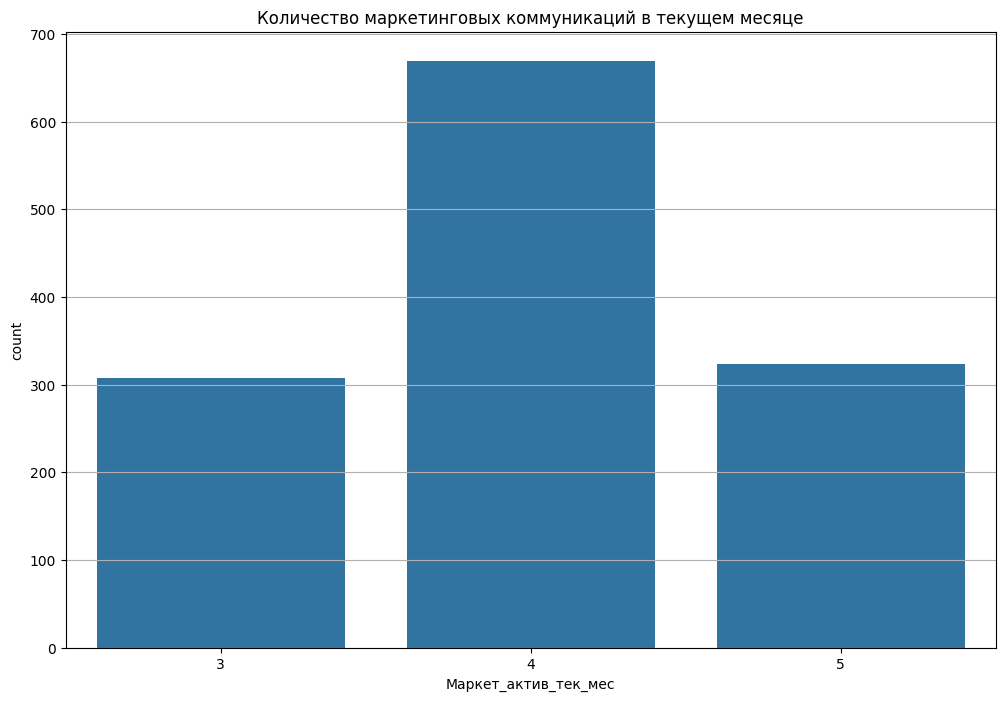

In [33]:
plt.figure(figsize=(12,8))
plt.grid(True)
sns.countplot(data=market_main, x='Маркет_актив_тек_мес')
plt.title('Количество маркетинговых коммуникаций в текущем месяце')
plt.show()

Количество маркетинговых коммуникаций в текущем месяце равно 3, 4 или 5, чаще всего встречается значение 4, распределение нормальное.

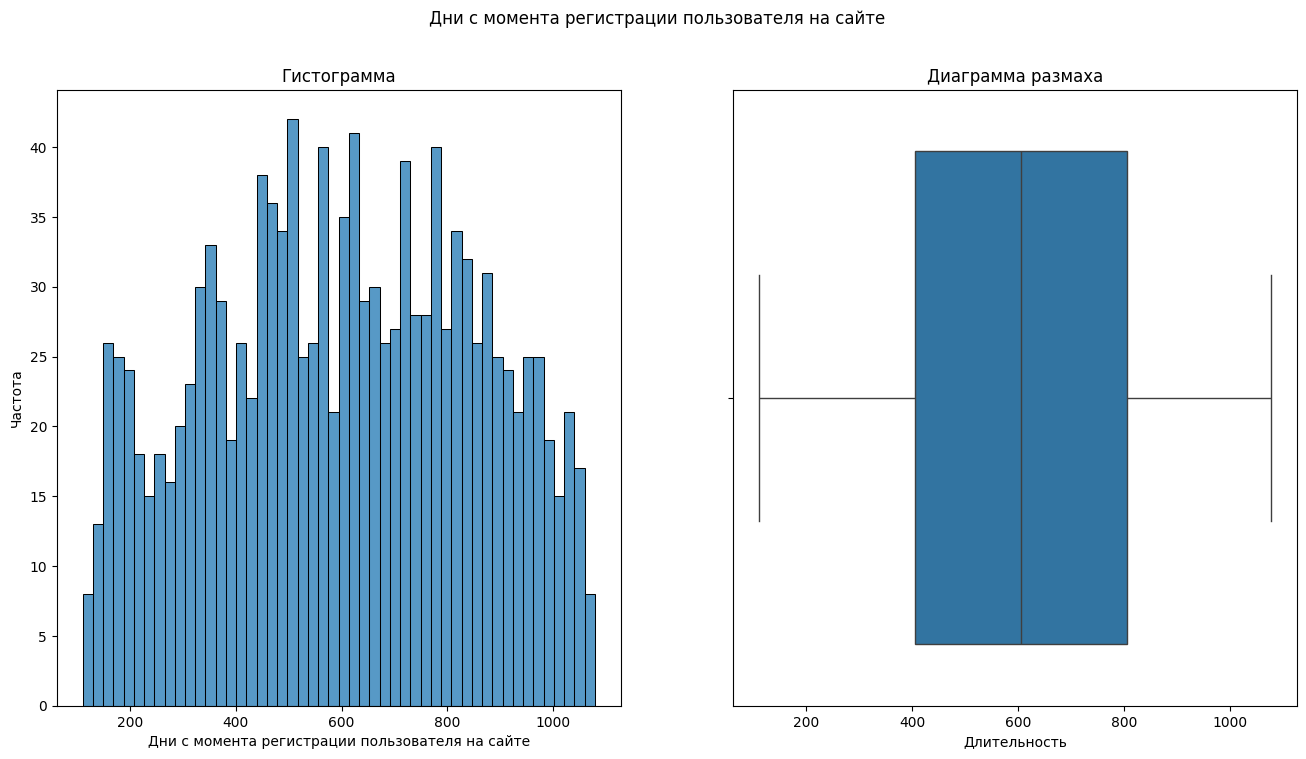

In [34]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = market_main, x = 'Длительность', ax=axs[0], bins = 50)
axs[0].set_xlabel('Дни с момента регистрации пользователя на сайте')
axs[0].set_ylabel('Частота')
axs[0].set_title('Гистограмма')
sns.boxplot(data = market_main, x = 'Длительность', ax=axs[1])
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Дни с момента регистрации пользователя на сайте')
plt.show()

Основная масса пользоваелей зарегестрировала от 400 до 800 дней назада, среднее значение 601 день, максимальное 1079. В основном мы имеем дело со старыми клиентами. Распределение нормальное.

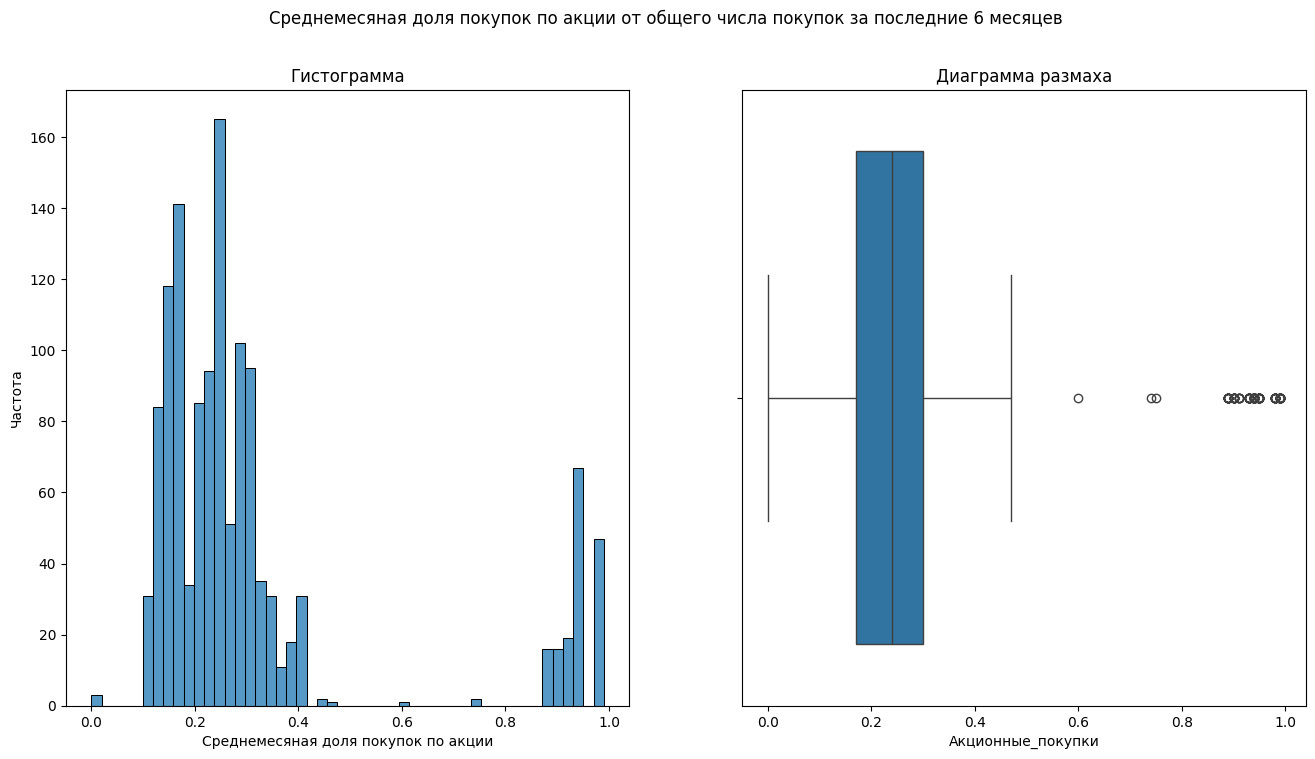

In [35]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = market_main, x = 'Акционные_покупки', ax=axs[0], bins = 50)
axs[0].set_xlabel('Среднемесяная доля покупок по акции')
axs[0].set_ylabel('Частота')
axs[0].set_title('Гистограмма')
sns.boxplot(data = market_main, x = 'Акционные_покупки', ax=axs[1])
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Среднемесяная доля покупок по акции от общего числа покупок за последние 6 месяцев')
plt.show()

In [36]:
market_main['Акционные_покупки'].describe()

count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: Акционные_покупки, dtype: float64

Распределение ненормальное, есть выбивающиеся значения, но их тоже нельзя считать аномалиями. Максимальное значение 0,99, но пользователь вполне может покупать вообще все товары по акции. На диаграмме мы видимо группу пользователей, которые покупают только товары по акции. Можно предположить, что если акционных товаров станет меньше, то и покупательская активность этих клиентов снизится.

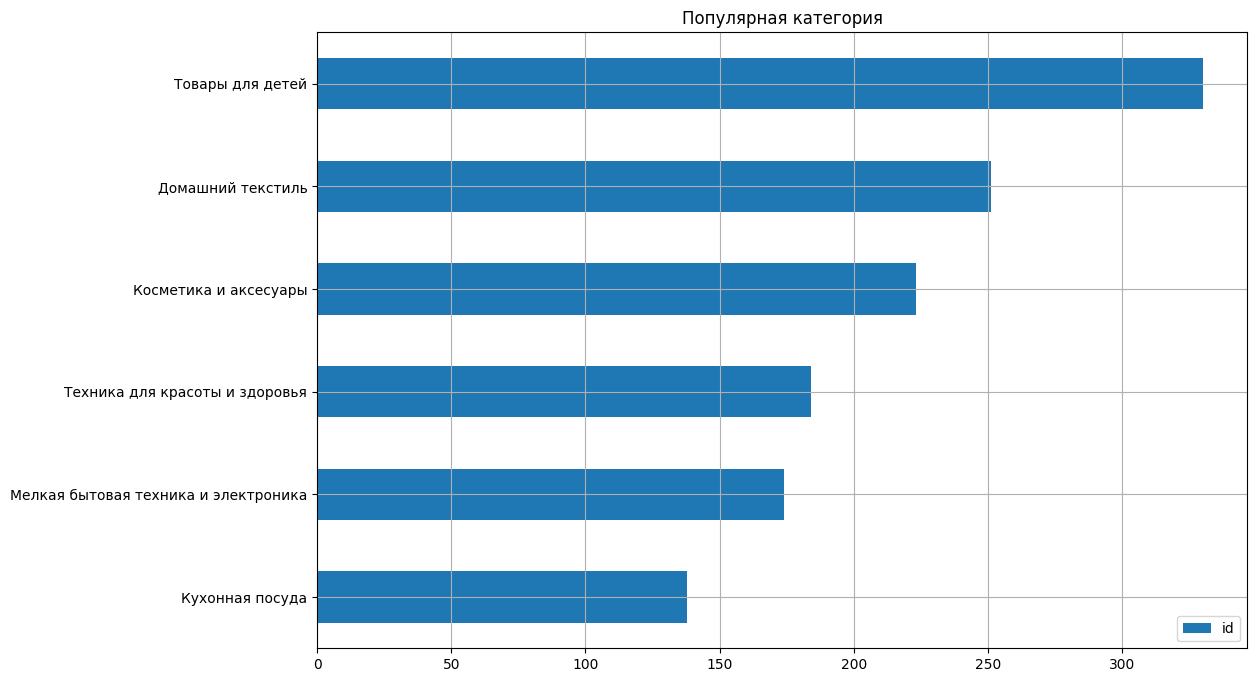

In [37]:
market_main.pivot_table(index='Популярная_категория', values = 'id', aggfunc = 'count').sort_values(by='id', ascending = True).plot(kind='barh', figsize=(12,8))
plt.grid(True)
plt.title('Популярная категория')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Самая популярная категория "Товары для детей", на последнем месте "Кухонная посуда"

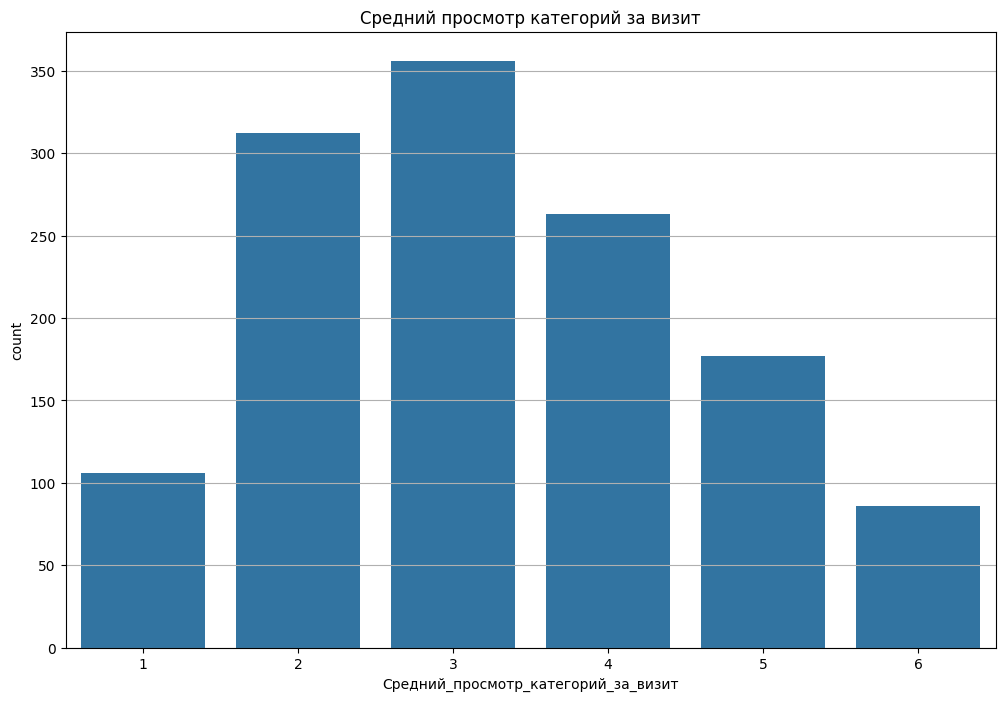

In [38]:
plt.figure(figsize=(12,8))
plt.grid(True)
sns.countplot(data=market_main, x='Средний_просмотр_категорий_за_визит')
plt.title('Средний просмотр категорий за визит')
plt.show()

Чаще всего пользователи просматривают 3 категории за визит, аномальных занчений нет, распределение нормальное.

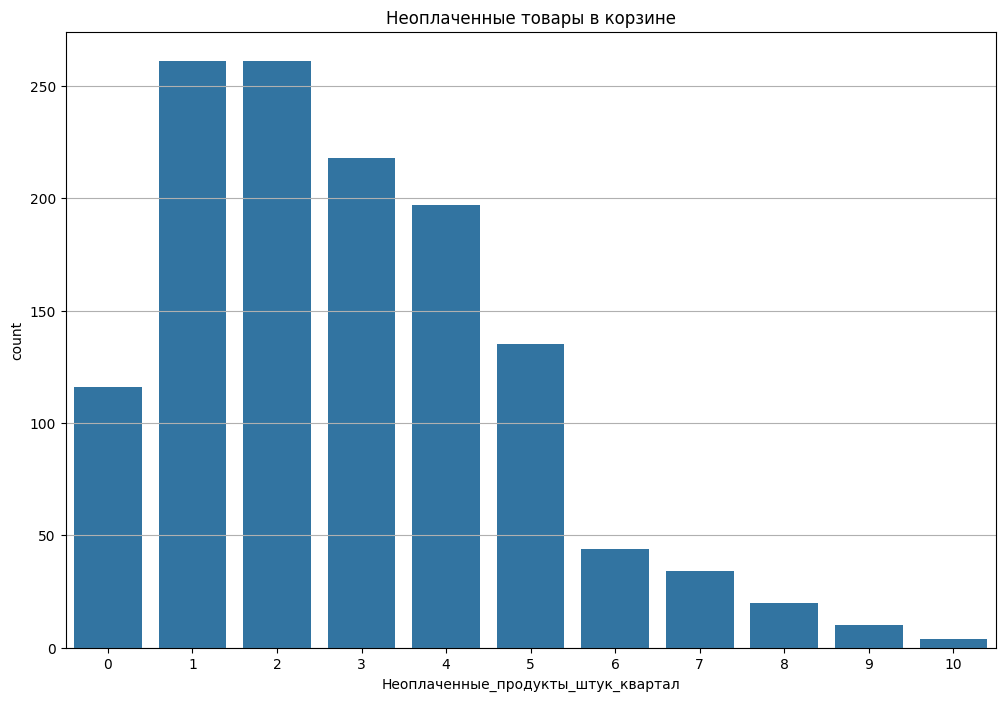

In [39]:
plt.figure(figsize=(12,8))
plt.grid(True)
sns.countplot(data=market_main, x='Неоплаченные_продукты_штук_квартал')
plt.title('Неоплаченные товары в корзине')
plt.show()

Чаще всего клиенты не оплачивают 1 или два товара, есть выбивающиеся значения: 9 и 10 товаров, но цифры вполне реальные, поэтому это не аномалии, распределение нормальное.

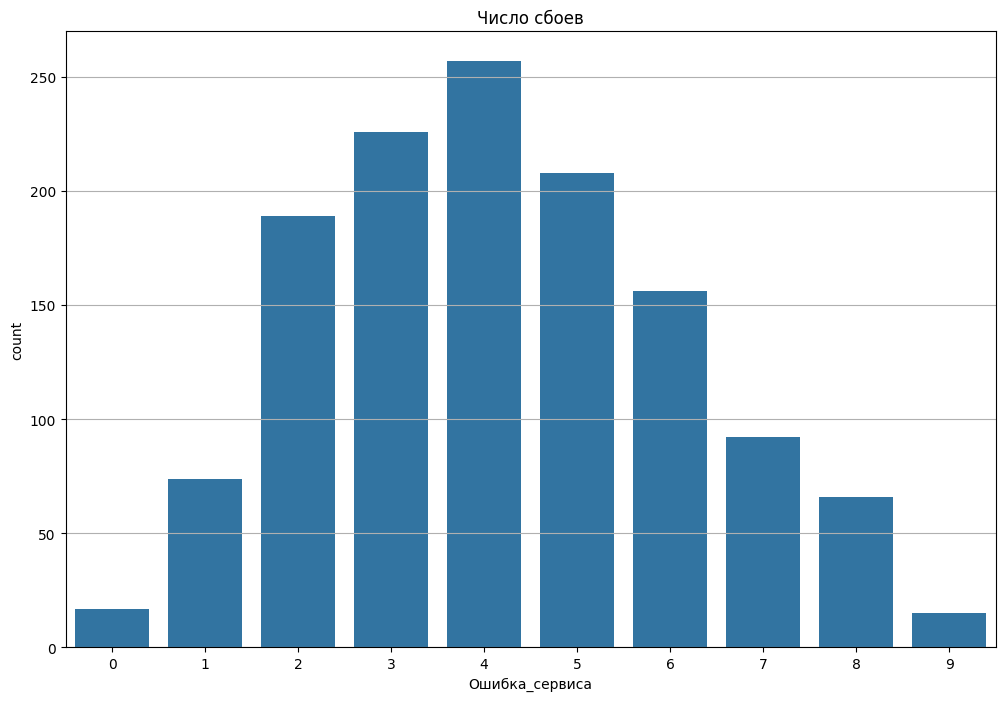

In [40]:
plt.figure(figsize=(12,8))
plt.grid(True)
sns.countplot(data=market_main, x='Ошибка_сервиса')
plt.title('Число сбоев')
plt.show()

В основном покупатели столнули с 4 сбоями, распределение нормальное, аномалий нет.

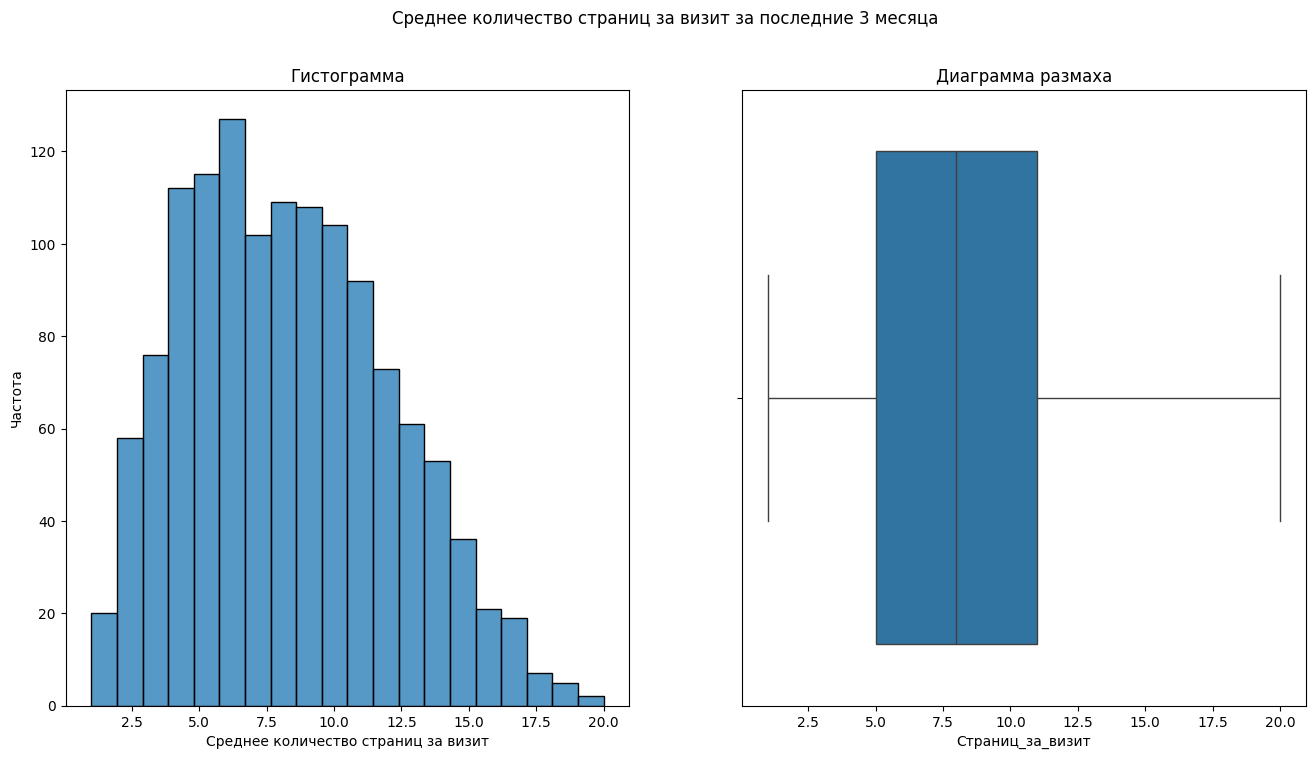

In [41]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = market_main, x = 'Страниц_за_визит', ax=axs[0], bins = 20)
axs[0].set_xlabel('Среднее количество страниц за визит')
axs[0].set_ylabel('Частота')
axs[0].set_title('Гистограмма')
sns.boxplot(data = market_main, x = 'Страниц_за_визит', ax=axs[1])
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Среднее количество страниц за визит за последние 3 месяца')
plt.show()

Распределение нормальное, в среднем пользователи просматривают от 5 до 11 страниц за визит.

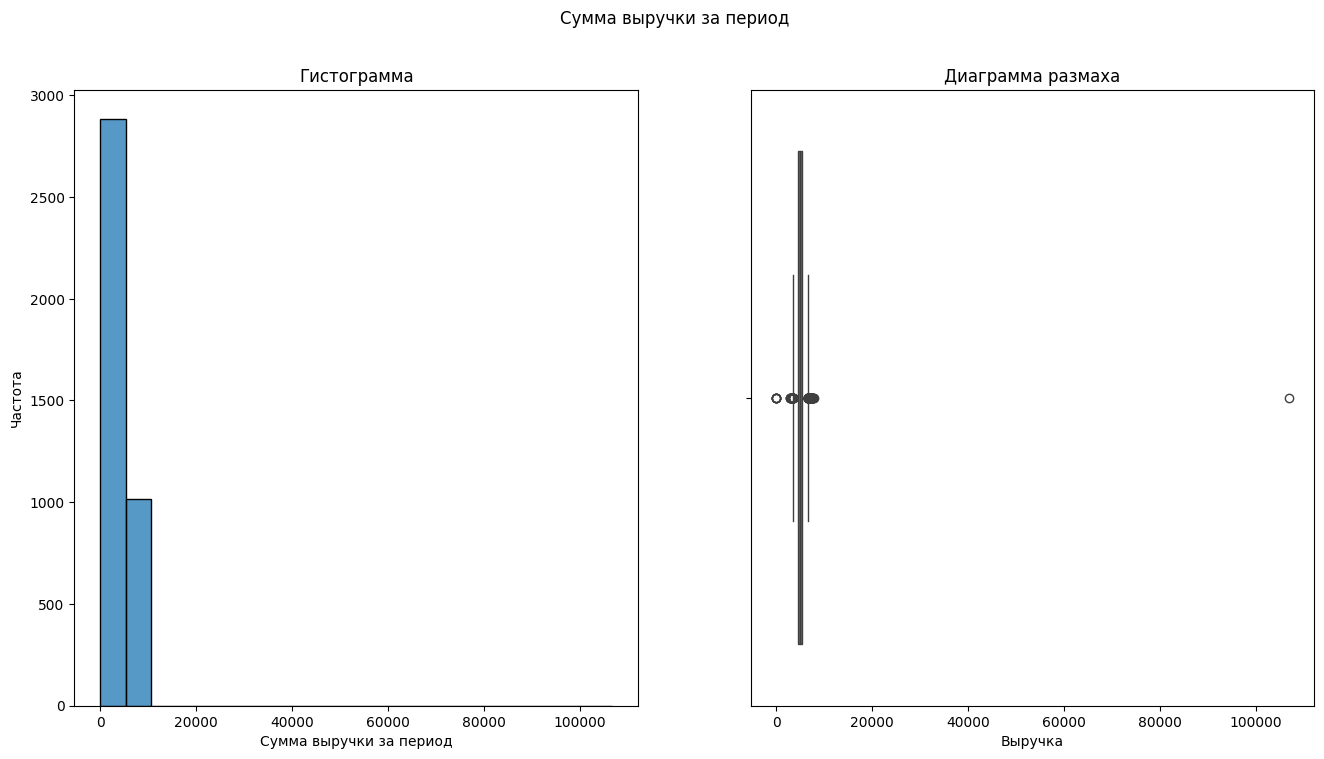

In [42]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = market_money, x = 'Выручка', ax=axs[0], bins = 20)
axs[0].set_xlabel('Сумма выручки за период')
axs[0].set_ylabel('Частота')
axs[0].set_title('Гистограмма')
sns.boxplot(data = market_money, x = 'Выручка', ax=axs[1])
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Сумма выручки за период')
plt.show()

In [43]:
market_money['Выручка'].describe()

count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: Выручка, dtype: float64

Есть одно сильно выбивающееся значение - 106862. Это число сильно выбивается из общей массы пользователей, удалим его.

In [44]:
market_money = market_money[market_money['Выручка'] < 100000]

In [45]:
market_money['Выручка'].describe()

count    3899.00000
mean     4999.57743
std       706.99988
min         0.00000
25%      4590.10000
50%      4957.00000
75%      5363.00000
max      7799.40000
Name: Выручка, dtype: float64

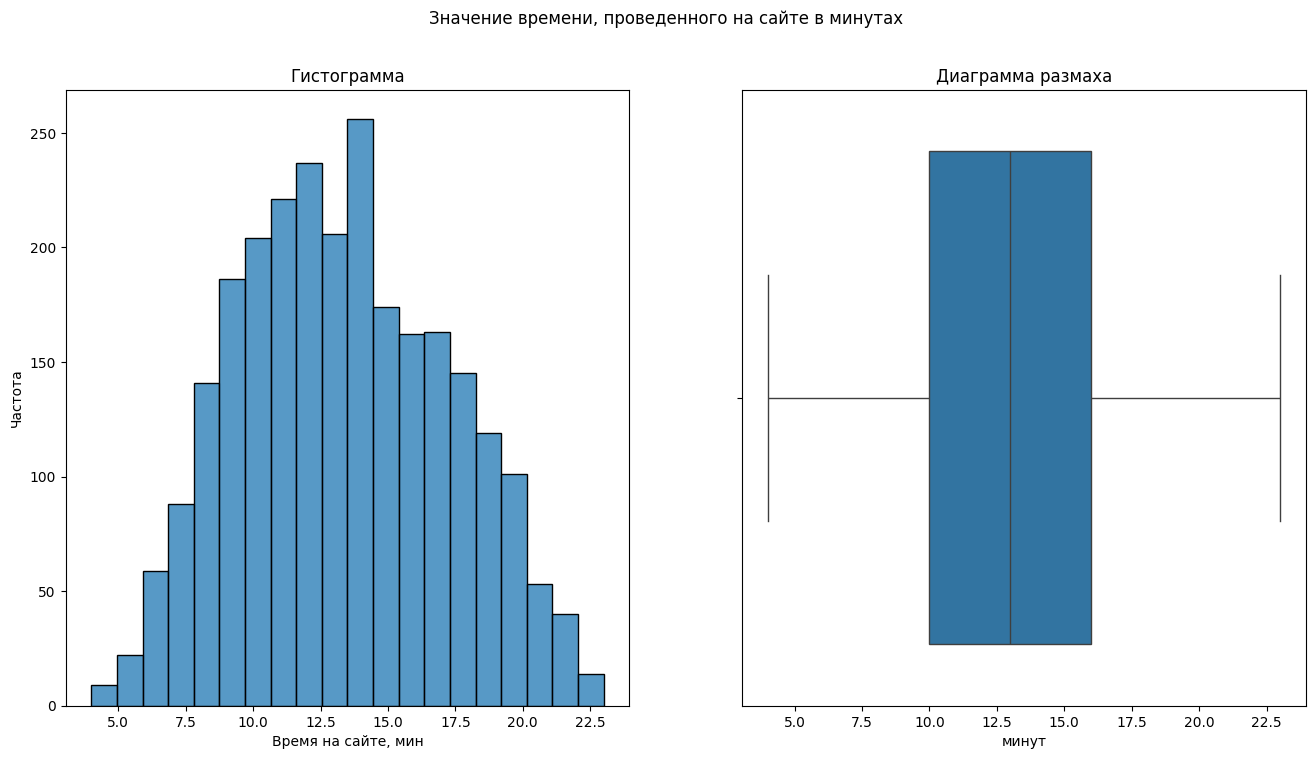

In [46]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = market_time, x = 'минут', ax=axs[0], bins = 20)
axs[0].set_xlabel('Время на сайте, мин')
axs[0].set_ylabel('Частота')
axs[0].set_title('Гистограмма')
sns.boxplot(data = market_time, x = 'минут', ax=axs[1])
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Значение времени, проведенного на сайте в минутах')
plt.show()

Распределение нормальное, в среднем пользователи проводат на сайте от 10 до 16 минут.

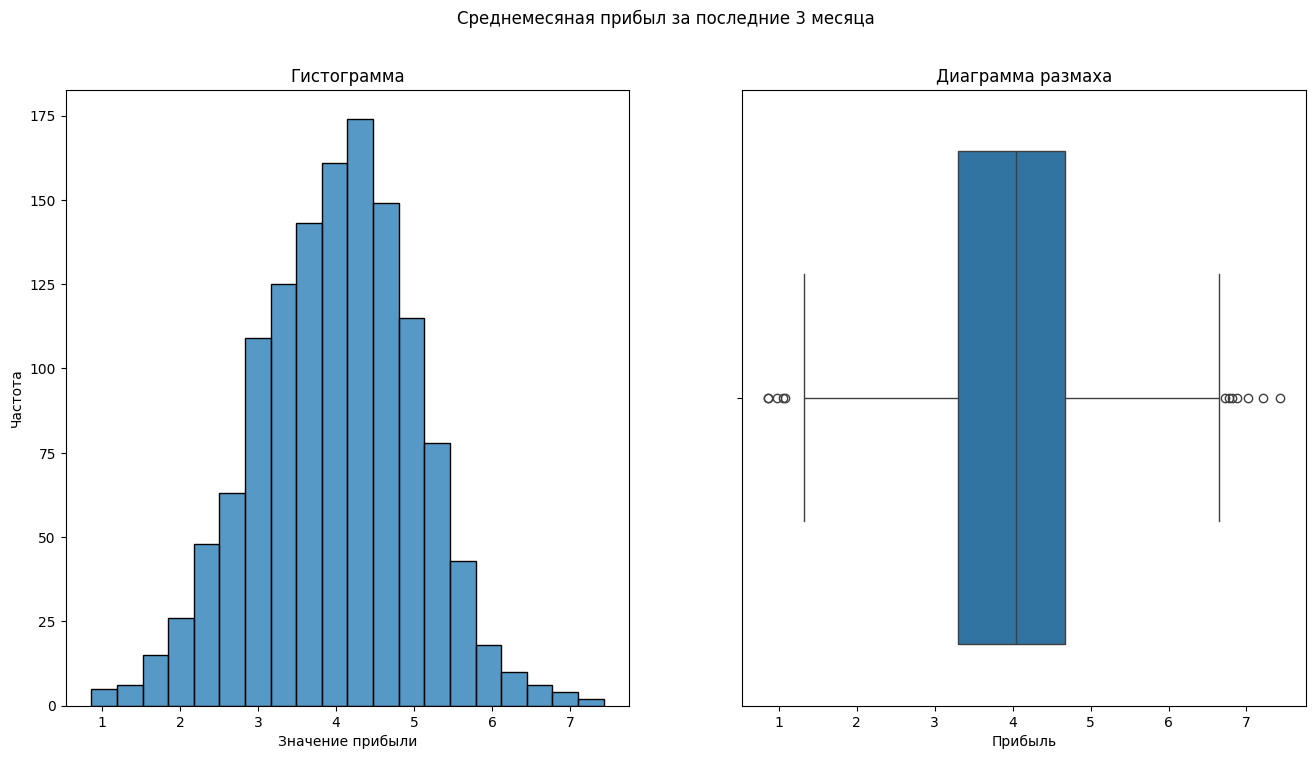

In [47]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = money, x = 'Прибыль', ax=axs[0], bins = 20)
axs[0].set_xlabel('Значение прибыли')
axs[0].set_ylabel('Частота')
axs[0].set_title('Гистограмма')
sns.boxplot(data = money, x = 'Прибыль', ax=axs[1])
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Среднемесяная прибыл за последние 3 месяца')
plt.show()

In [48]:
money['Прибыль'].describe()

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: Прибыль, dtype: float64

Есть несколько выбивающихся значений, но их нельзя считать аномалиями, цифры вполне реальные, распределение нормальное.

###  Отбор активных клиентов

In [49]:
id_money = market_money.loc[market_money['Выручка']==0, 'id'].unique()
market_main = market_main[~market_main['id'].isin(id_money)]
market_money = market_money[~market_money['id'].isin(id_money)]
market_time = market_time[~market_time['id'].isin(id_money)]
money = money[~money['id'].isin(id_money)]

###  Вывод

Все данные, кроме Среднемесяной доли покупок по акции распределены нормально, в некоторых данных есть выбросы, но цифры похожи на реальные значения, поэтому я их не стала удалять. Отобрала клиентов с покупательской актинвостью не менее трех месяцев.

##  Объединение таблиц

In [50]:
market_money.head()

,id,Период,Выручка
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4


In [51]:
result_market_money = market_money.pivot_table(index='id', columns='Период', values='Выручка', aggfunc='first')
result_market_money.head()

Период,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
id,,,
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4
215351,6158.0,4793.0,6610.4
215352,5807.5,4594.0,5872.5
215353,4738.5,5124.0,5388.5


In [52]:
result_market_time = market_time.pivot_table(index='id', columns='Период', values='минут', aggfunc='first')
result_market_time.head()

Период,предыдущий_месяц,текущий_месяц
id,,
215349,12,10
215350,8,13
215351,11,13
215352,8,11
215353,10,10


In [53]:
result_data = market_main.merge(result_market_money, on='id').merge(result_market_time, on='id')

In [54]:
result_data = result_data.rename(columns={
    'id': 'id',
    'предыдущий_месяц_x': 'предыдущий_месяц_выручка',
    'препредыдущий_месяц': 'препредыдущий_месяц_выручка',
    'текущий_месяц_x': 'текущий_месяц_выручка',
    'предыдущий_месяц_y': 'предыдущий_месяц_время',
    'текущий_месяц_y': 'текущий_месяц_время',
})

In [55]:
result_data.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_время,текущий_месяц_время
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


**Вывод:**

Объединили таблицы, необходимые для исследования    

In [56]:
null_data = result_data[result_data.isnull().any(axis=1)]
null_data

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_время,текущий_месяц_время
29,215380,Снизилась,премиум,нет,1.7,4,637,0.94,Техника для красоты и здоровья,3,2,4,7,6077.0,5051.0,NaN,12,14


In [57]:
result_data = result_data.dropna()

In [58]:
null_data = result_data[result_data.isnull().any(axis=1)]
null_data

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_время,текущий_месяц_время


##  Корреляционный анализ

### Рассчитаем коэффициенты корреляции между всеми признаками и построим тепловую карту

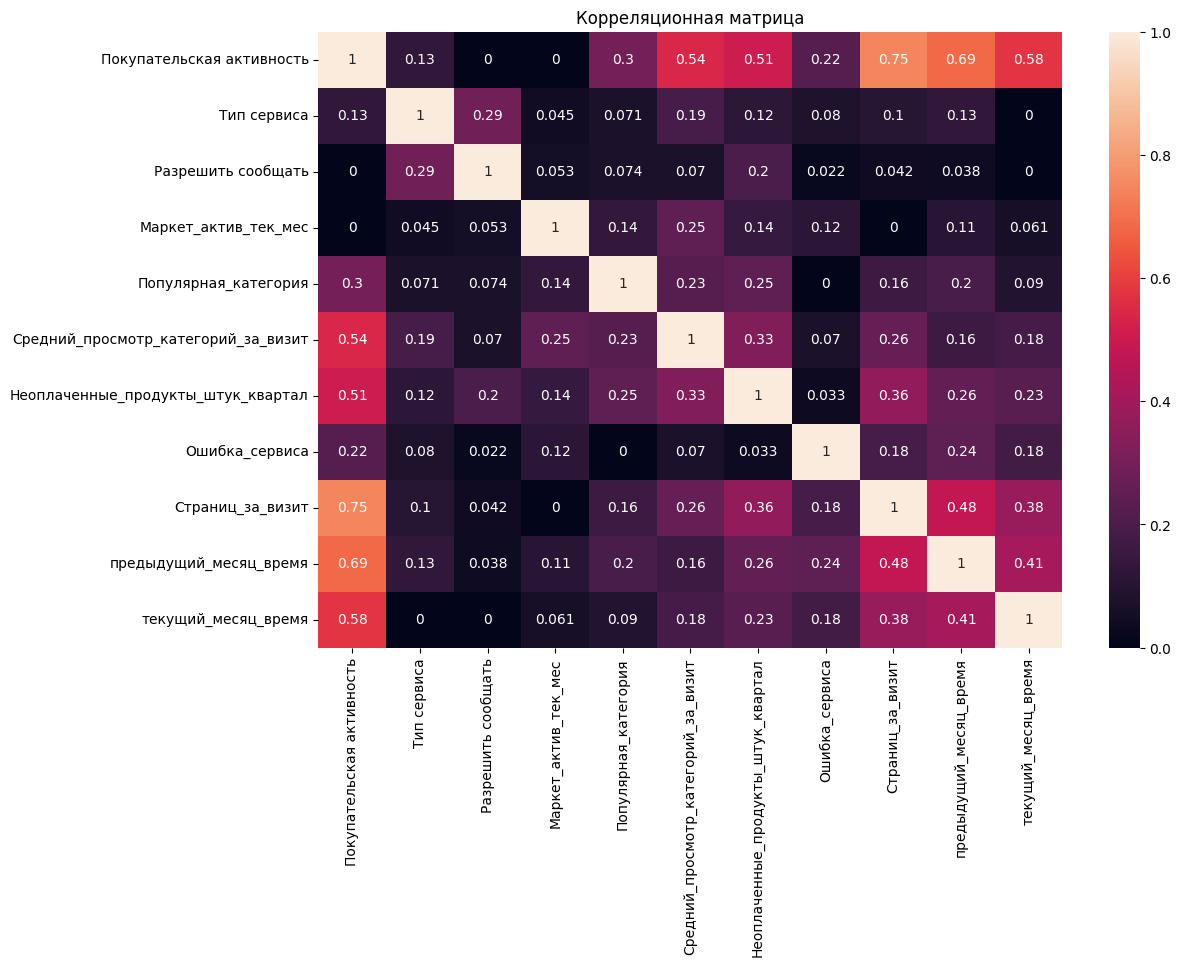

In [59]:
plt.figure(figsize=(12, 8))
sns.heatmap(result_data.drop(['id',
                              'Маркет_актив_6_мес',
                              'Длительность',
                              'Акционные_покупки',
                              'препредыдущий_месяц_выручка',
                              'предыдущий_месяц_выручка',
                              'текущий_месяц_выручка'], axis=1).phik_matrix(interval_cols=['Маркет_актив_6_мес', 
                                                                      'Маркет_актив_тек_мес', 
                                                                      'Длительность',
                                                                      'Акционные_покупки', 
                                                                      'Средний_просмотр_категорий_за_визит', 
                                                                      'Неоплаченные_продукты_штук_квартал', 
                                                                      'Ошибка_сервиса', 
                                                                      'Страниц_за_визит', 
                                                                      'предыдущий_месяц_выручка', 
                                                                      'препредыдущий_месяц_выручка', 
                                                                      'текущий_месяц_выручка', 
                                                                      'предыдущий_месяц_время', 
                                                                      'текущий_месяц_время']), annot=True)
plt.title('Корреляционная матрица')
plt.show()

* Мультиколлинеарность не обнаружена
* Самая большая корреляция наблюдается между целевым признаком и количеством страниц за визит, временем, проведенным на сайте в предыдущем месяце, временем проведенном на сайте в текущем месяце, неоплаченными товарами и временем, проведенным на сайте в предпредыдущем месяце.
* Корреляция отсутсвует между целевым признаком и информацией о том, можно ли присылать покупателю дополнительные предложения о товаре, маркетинговой активностью в текущем месяце и выручки в текущем месяце. Если модель будет работать плохо, эти данные можно будет удалить.

##  Использование пайплайнов

###  Подготовка данных

In [60]:
result_data.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_время,текущий_месяц_время
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


In [61]:
y = result_data['Покупательская активность']
X = result_data.drop(['Покупательская активность', 'id'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.25, 
    random_state = RANDOM_STATE,
    stratify = y
   )

In [62]:
# создаём списки с названиями признаков
ohe_columns = ['Популярная_категория']
ord_columns = ['Тип сервиса', 'Разрешить сообщать']
num_columns = ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'предыдущий_месяц_выручка', 'препредыдущий_месяц_выручка', 'текущий_месяц_выручка', 'предыдущий_месяц_время', 'текущий_месяц_время']

In [63]:
result_data['Тип сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [64]:
result_data['Разрешить сообщать'].unique()

array(['да', 'нет'], dtype=object)

In [65]:
# создаём пайплайн для подготовки признаков из списка ohe_columns
ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
)

In [66]:
# создаём пайплайн для подготовки признаков из списка ord_columns
ord_pipe = Pipeline(
    [
        ('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ord', OrdinalEncoder(
            categories=[
                ['премиум', 'стандарт'],
                ['да', 'нет']
            ],
             handle_unknown='use_encoded_value', unknown_value=np.nan
        )),
        ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [67]:
num_pipe = Pipeline(
    [
        ('simpleImputer_num', SimpleImputer(missing_values=np.nan, strategy='median')),
        ('scaler', StandardScaler())
    ]
)

In [68]:
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', num_pipe, num_columns)
    ], remainder='passthrough'
)

In [69]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

###  Обучим 4 модели

Основной будет метрика ROC-AUC, так как необходимо оценить качество работы вне зависимости от выбранного порога вероятности, а также потому что в данных есть дисбаланс классов. Также я хочу оценить метрику recall, чтобы понять насколько хорошо модель находит клиентов, покупательская спосбоность которых снизилась. Нам важно не пропускать таких клиентов.

In [70]:
# создаем словари для моделей
param_grid = [
    # словарь для модели KNeighborsClassifier()
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 50),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 10),
        'models__max_features': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
     # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', max_iter=3000)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'models__C': range(1, 5)
    },
    # словарь для модели SVC()
    {
       'models': [SVC(random_state=RANDOM_STATE, probability=True)],    
    }
]

###  Выберем лучшу модель, используя метрику ROC-AUC и recall

####  Используем один общий пайплайн для всех моделей

In [71]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter=20
)

In [72]:
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['Популярная_категория']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImpu...
                                         'models__max_features': range(2, 10),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [LogisticRegression(max_iter=3000,
                                                                       random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': range(1, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(probability=True,
                                                        random_state=42)]}],
                   random_state=42, scoring='roc_auc')

In [73]:
randomized_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(stra...
                                                   'Маркет_актив_тек_мес',
                                                   'Длительность',
                                                   'Акционные_покупки',
                                                   'Средний_просмотр_категорий_за_визит',
                                                   'Неоплаченные_продукты_штук_квартал',
                                                   'Ошибка_сервиса',
                                                   'Страниц_за_визит',
                                                   'предыдущий_месяц_выручка',
                                                   'препредыдущий_месяц_выручка',
                                                   'текущий_месяц_выручка',
                                                   'предыдущий_месяц_время',
                                                   'текущий_месяц_время'])])),
                ('models', KNeighborsClassifier(n_neighbors=27))])

In [74]:
randomized_search.best_score_

0.9083092720819993

Лучшая модель - KNeighborsClassifier, с количеством ближайших соседей равным 27.

In [75]:
y_test_pred_proba = randomized_search.predict_proba(X_test)

In [76]:
y_test_pred = randomized_search.predict(X_test)

In [77]:
recall_score(y_test, y_test_pred, pos_label='Снизилась')

0.8130081300813008

In [78]:
roc_auc_score(y_test, y_test_pred_proba[:, 1])

0.9190834445657888

Значение метрики recall = 0.81, roc_auc = 0.91

Проверим лучшую модель на адекватность, сравнив качество её предсказаний с качеством модели, которая предсказывала бы константу.

In [79]:
dummy_model = DummyClassifier(random_state=RANDOM_STATE)
dummy_model.fit(X_train, y_train)

dummy_model_preds = dummy_model.predict(X_test)

dummy_acc = accuracy_score(y_test, dummy_model_preds)
dummy_acc

0.6203703703703703

Качество лучше модели значительно выше качества константной модели, значит все наши усилия оправданы.

##  Анализ важности признаков

###  Оценим важность признаков для лучшей модели и построим график важности с помощью метода SHAP

PermutationExplainer explainer: 325it [01:07,  4.49it/s]                                                               


<Axes: xlabel='SHAP value (impact on model output)'>

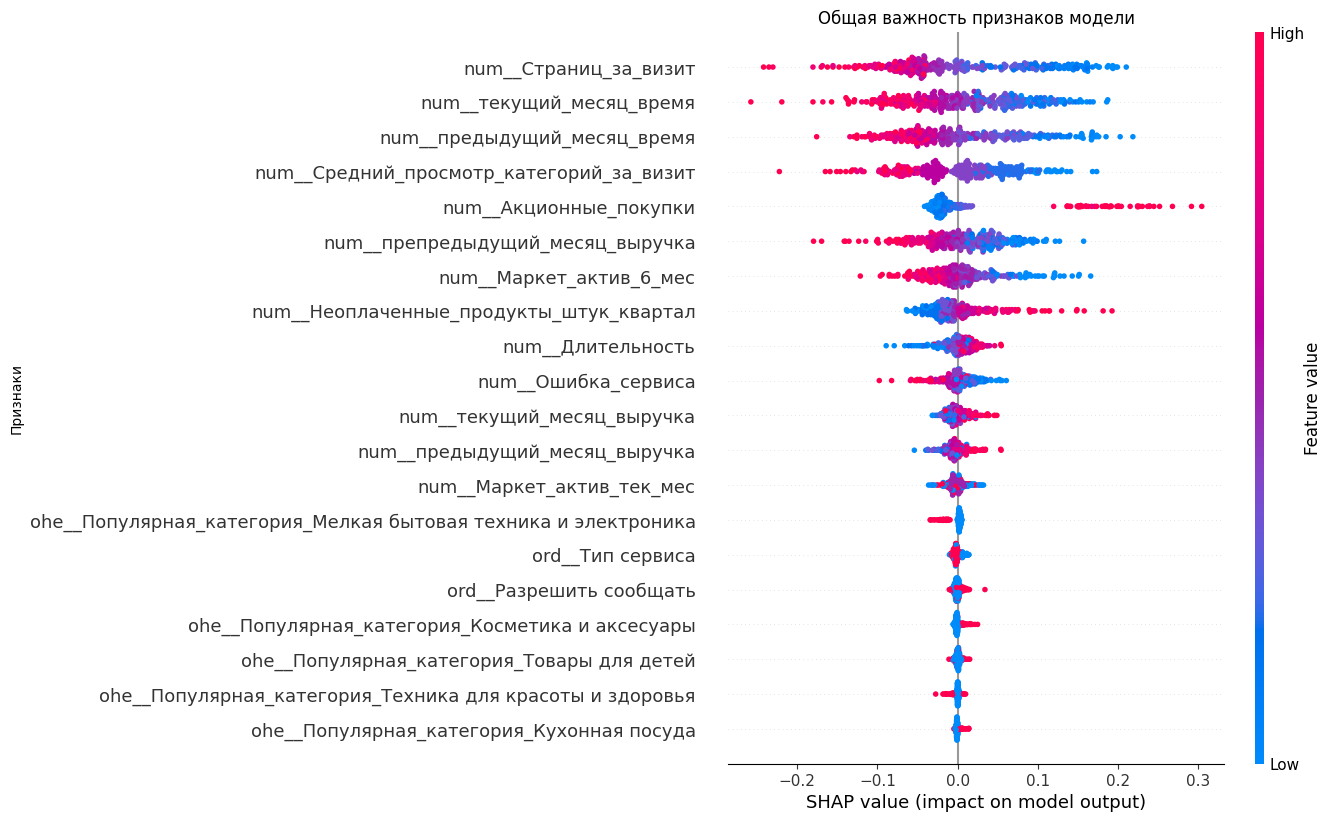

In [80]:
X_train_new = pipe_final.named_steps['preprocessor'].fit_transform(X_train)
X_test_new = pipe_final.named_steps['preprocessor'].transform(X_test)
feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()
X_test_new = pd.DataFrame(X_test_new, columns=feature_names)

explainer = shap.Explainer(randomized_search.best_estimator_.named_steps['models'].predict_proba, X_train_new)
shap_values = explainer(X_test_new)
display(shap.plots.beeswarm(shap_values[:,:,1], max_display=21, show=False))
plt.title('Общая важность признаков модели')
plt.ylabel('Признаки')
plt.show()

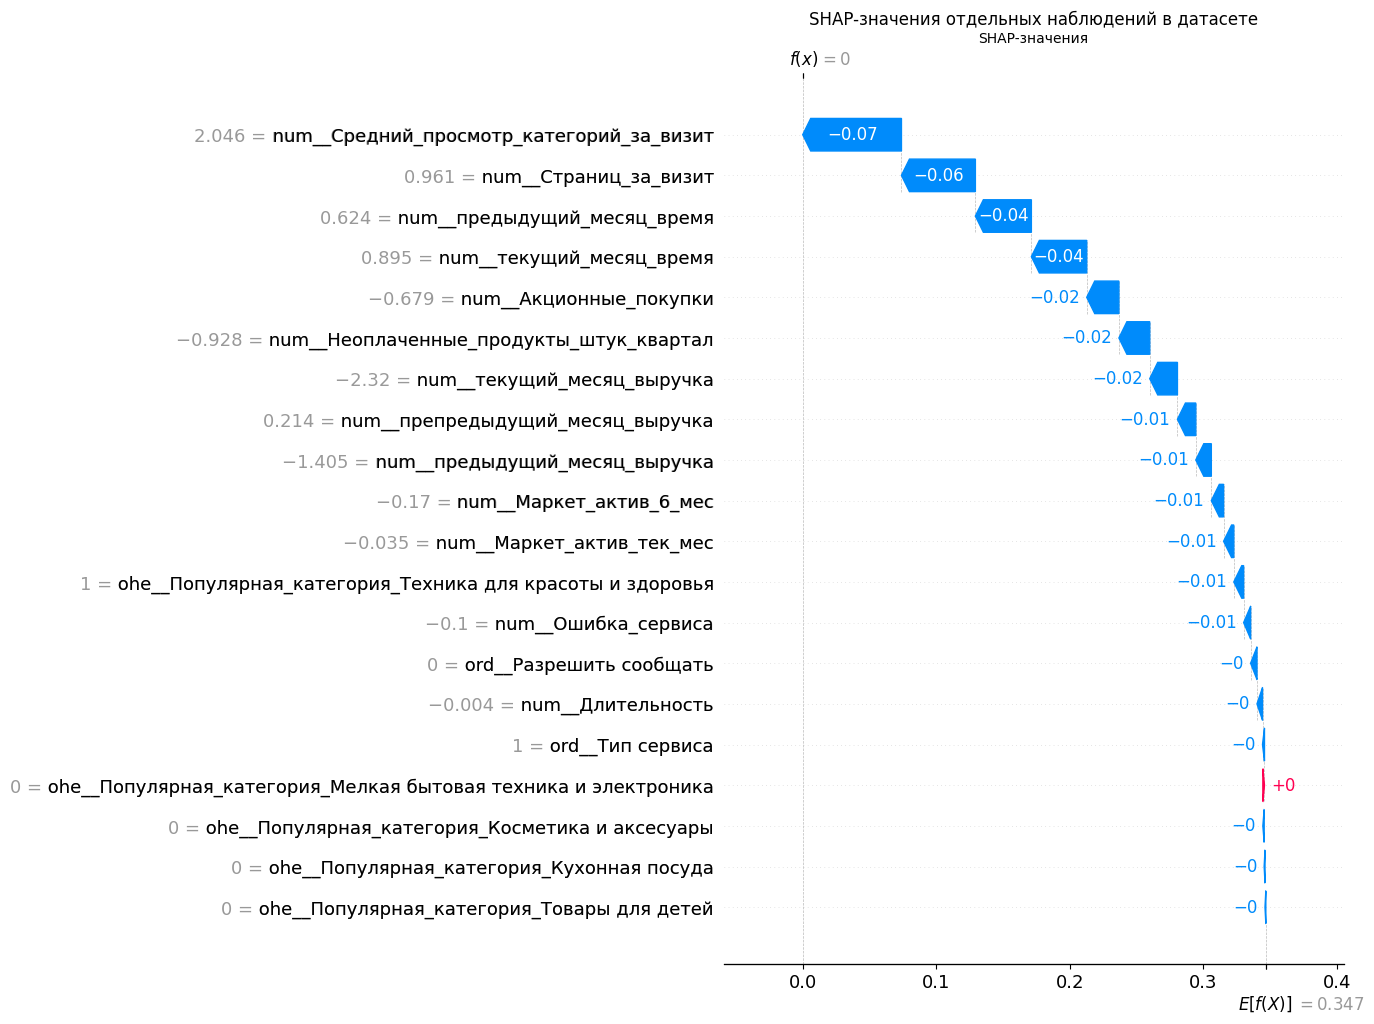

In [81]:
shap.plots.waterfall(shap_values[0, :, 1], max_display=21, show=False)
plt.title('SHAP-значения отдельных наблюдений в датасете')
plt.xlabel('SHAP-значения')
plt.ylabel('Признаки')
plt.show()

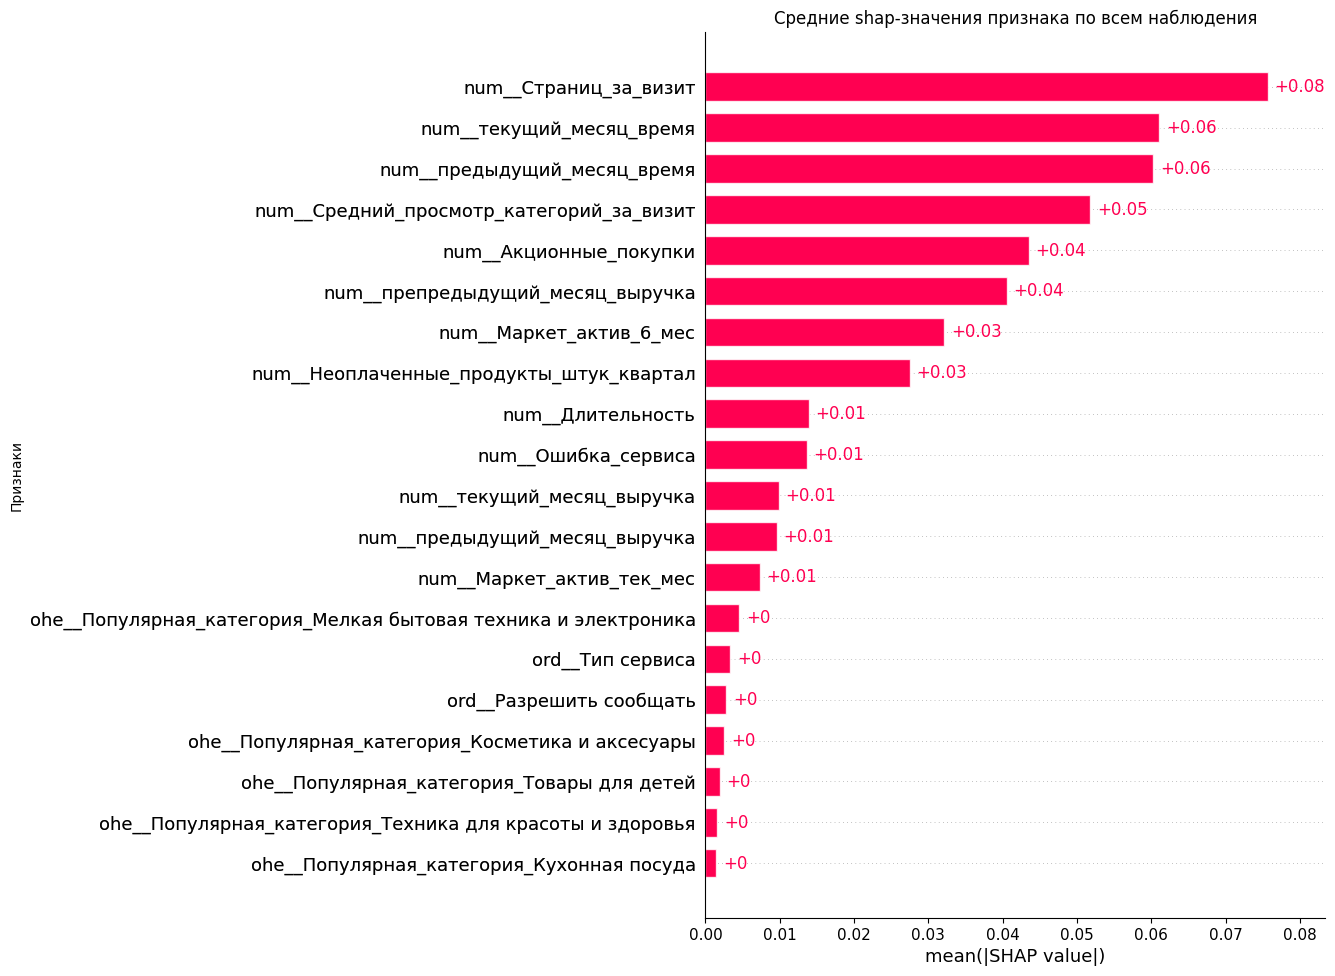

In [82]:
shap.plots.bar(shap_values[:,:,1], max_display=25, show=False)
plt.title('Средние shap-значения признака по всем наблюдения')
plt.ylabel('Признаки')
plt.show()

**Вывод:**

Больше всего на предсказание модели влияют такие признаки, как количество страниц за визит, акционные покупки, время, проведенное на сайте в предыдущем и текущем месяцах, есть признаки, которые совсем не влияют на предсказания модели: Популярные категории, тип сервиса и разрешение оповещений. 

Высокие значение признака количество страниц за визит увеличивают вероятность принадлежности активности клиента к классу "Понизился", та же самая ситуация с признаками "время, проведенное на сайте в предыдущем и текущем месяце" и средним просмотром категорий за визит. Это сложно интерпертировать, возможно стоит предлагать клиентам товары, которые они чаще всего покупают, чтобы они меньше проводили времени на сайте и сразу видели товары, которые им нужны.

Влияние признака "Акционные товары" интерпертировать проще. Высокие значения этого признака увеличивают вероятность принадлежности активности клиента к классу "Остался на прежнем уровне". Клиентам нравятся акционные предложение и стоит увеличить их количество и предлагать их клиентам.

##  Сегментация покупателей

Выполним сегментацию покупателей. Выберем покупателей, у которых высокая вероятность снижения покупательской активности (больше 0,7) и высокой среднемесячной прибылью за последние 3 месяца.

In [83]:
# добавим в датасет столбец с вероятность снижения покупательской активности
result_data['Вероятность снижения покупательской активности'] = randomized_search.best_estimator_.predict_proba(result_data)[:, 1]

# объединим итоговый датасет с данными о среднемесячной прибыли за последние три месяца
result_data = result_data.merge(money, on='id', how='inner')

In [84]:
result_data.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_время,текущий_месяц_время,Вероятность снижения покупательской активности,Прибыль
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,0.925926,4.16
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,0.481481,3.13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,0.777778,4.87
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,0.925926,4.21
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,0.666667,3.95


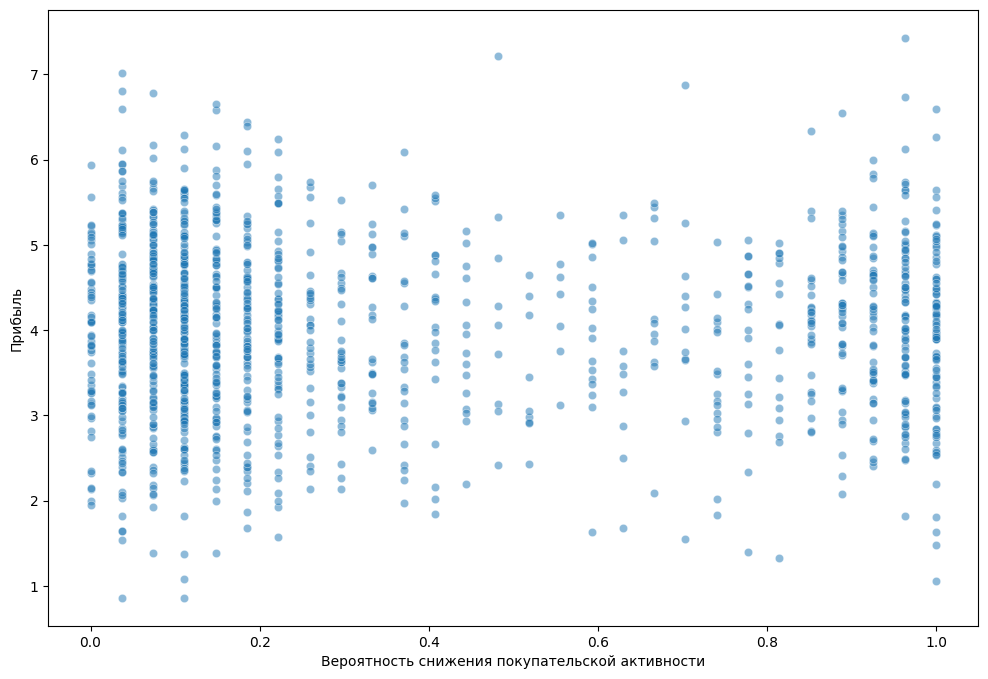

In [85]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=result_data,
    x='Вероятность снижения покупательской активности',
    y='Прибыль',
    alpha=0.5,   
)
plt.show('Диаграмма рассеяния прибыли и вероятности снижения покупательской активности')
plt.show()

Выберем сегмент покупателей, прибыль которых за последние три месяца больше четырех, вероятность снижения покупательской активности больше 0,7

In [86]:
segment_data_1 = result_data[(result_data['Прибыль'] > 4) & (result_data['Вероятность снижения покупательской активности'] > 0.7)]
segment_data_0 = result_data[(result_data['Прибыль'] <= 4) & (result_data['Вероятность снижения покупательской активности'] < 0.7)]

In [87]:
segment_data_1.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_время,текущий_месяц_время,Вероятность снижения покупательской активности,Прибыль
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,0.925926,4.16
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,0.777778,4.87
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,0.925926,4.21
7,215356,Снизилась,стандарт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3,4146.5,4433.0,4566.4,6,7,0.888889,4.93
17,215368,Снизилась,премиум,да,3.8,5,829,0.24,Техника для красоты и здоровья,2,2,6,1,5823.0,4536.0,5591.6,11,9,1.000000,6.27


Построим графики по каждому признаку и сделаем рекомендации

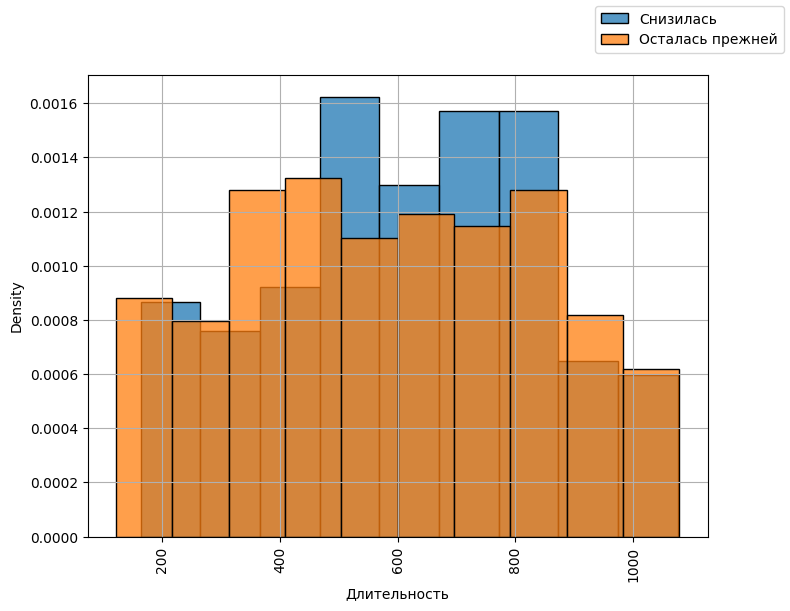

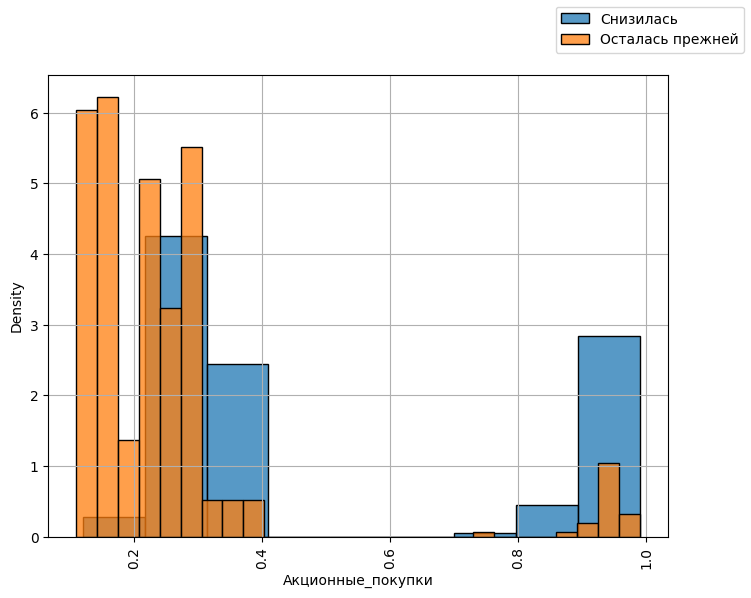

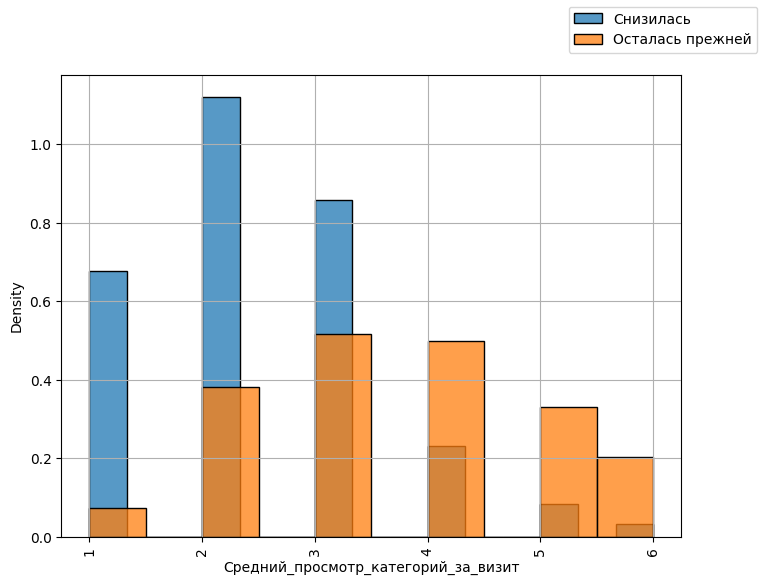

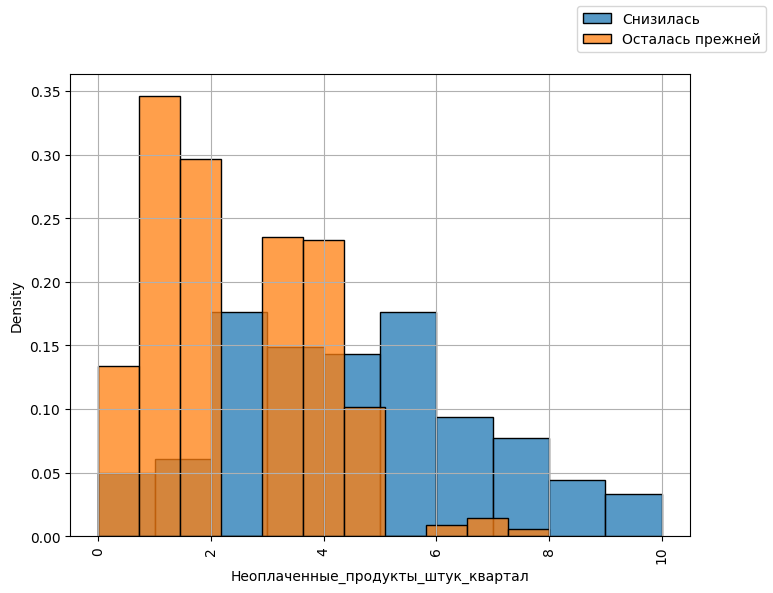

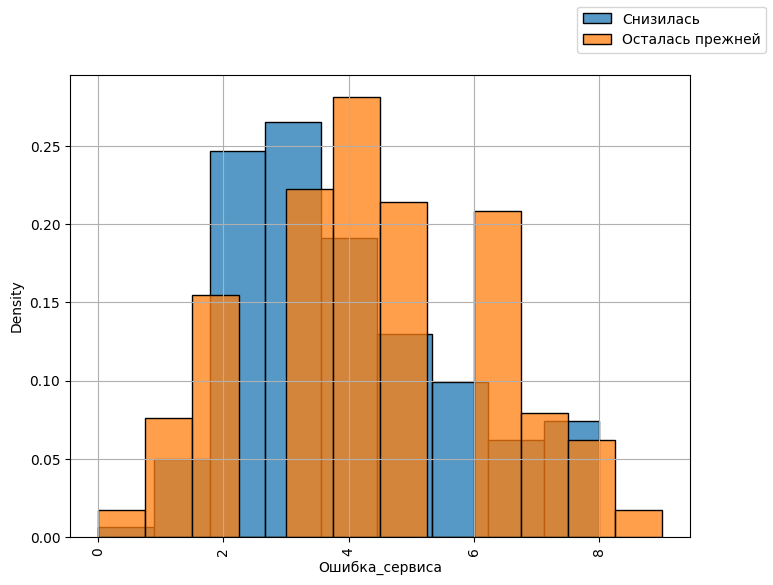

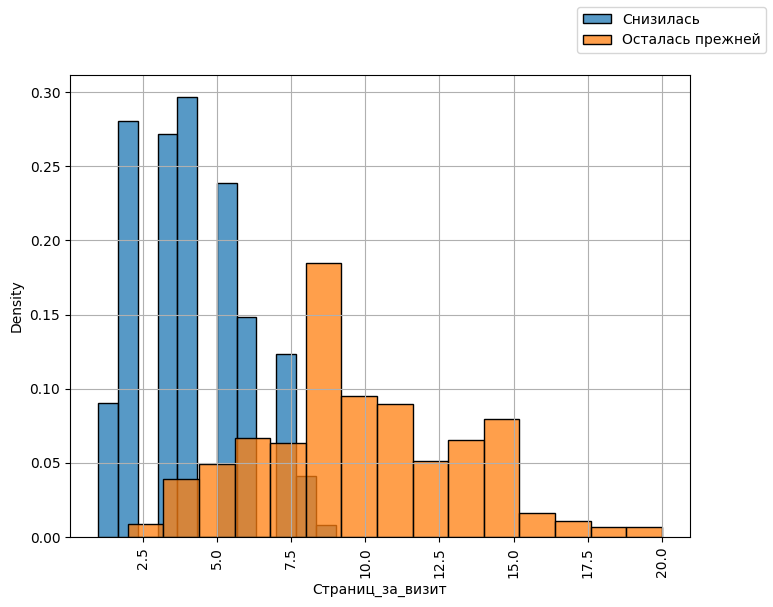

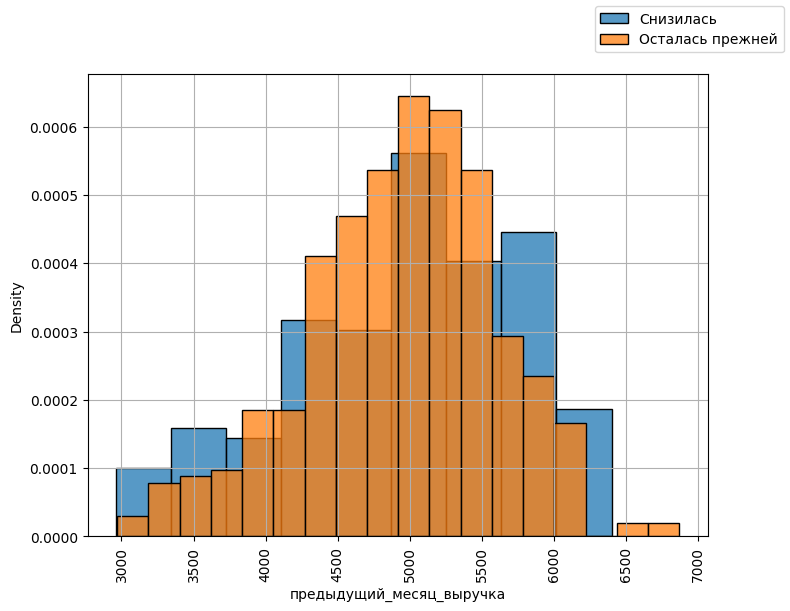

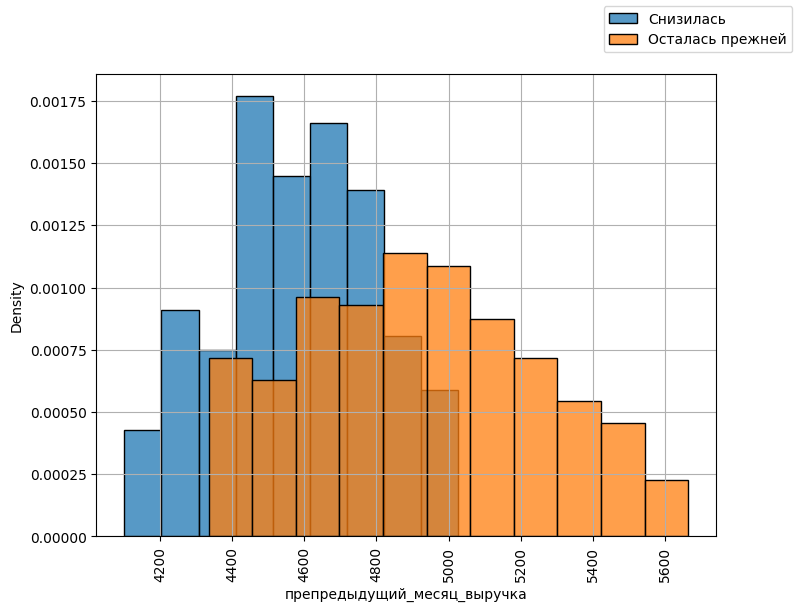

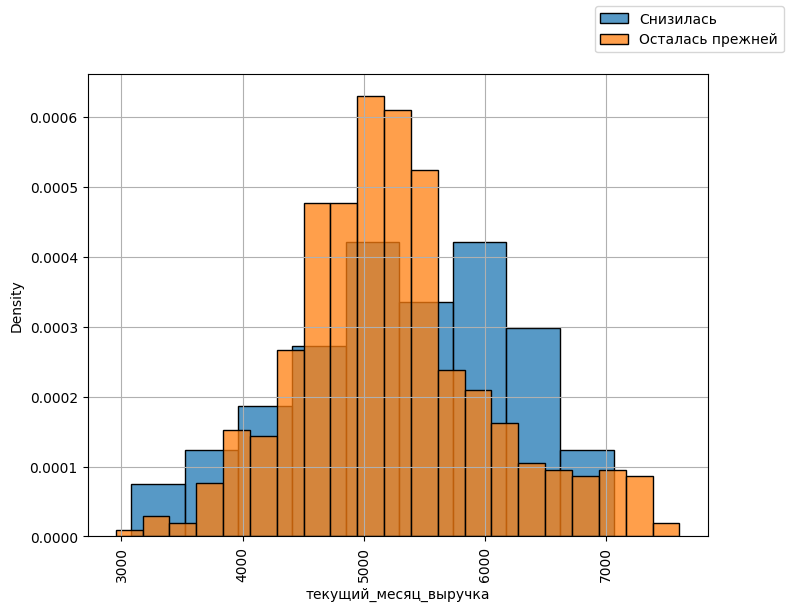

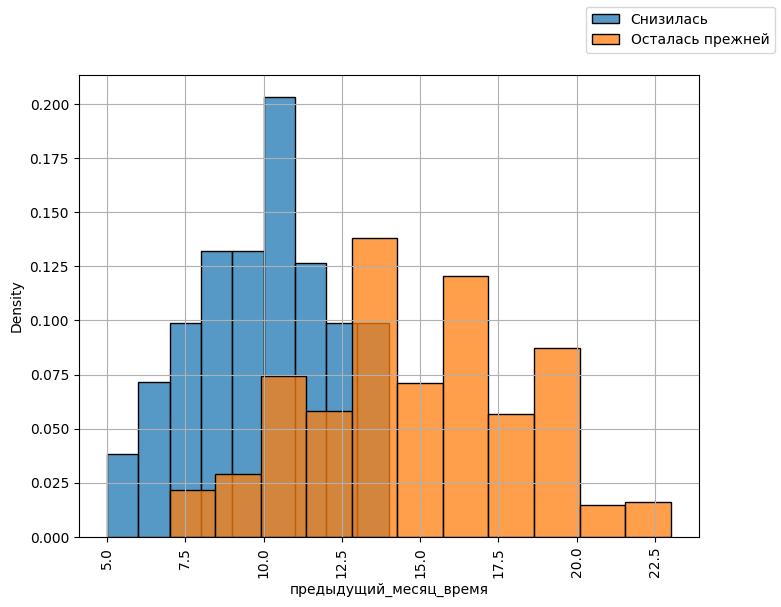

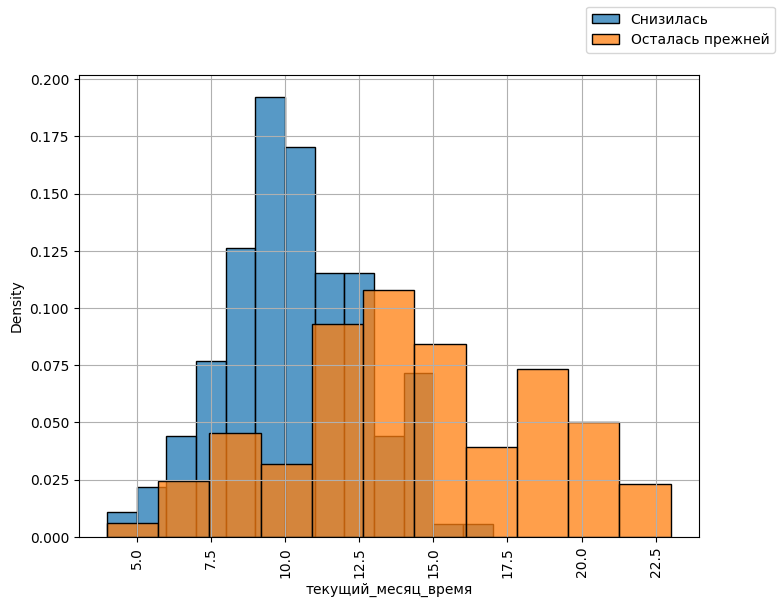

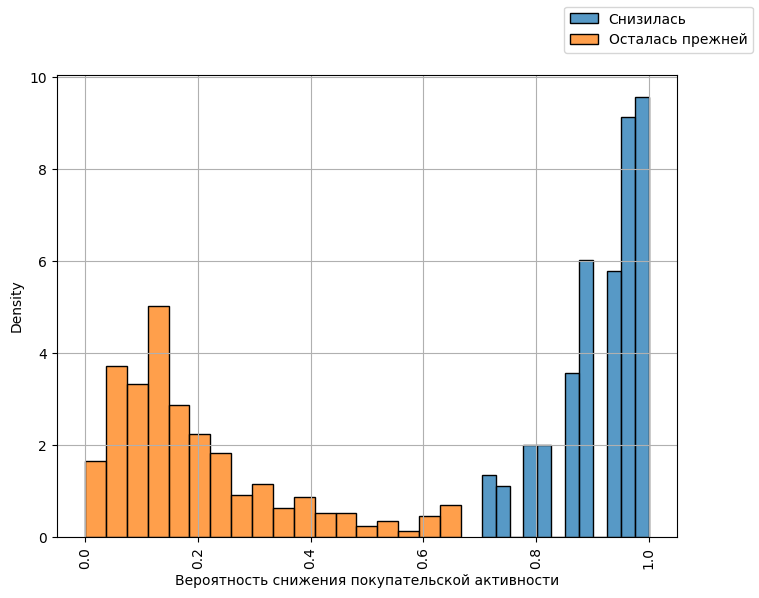

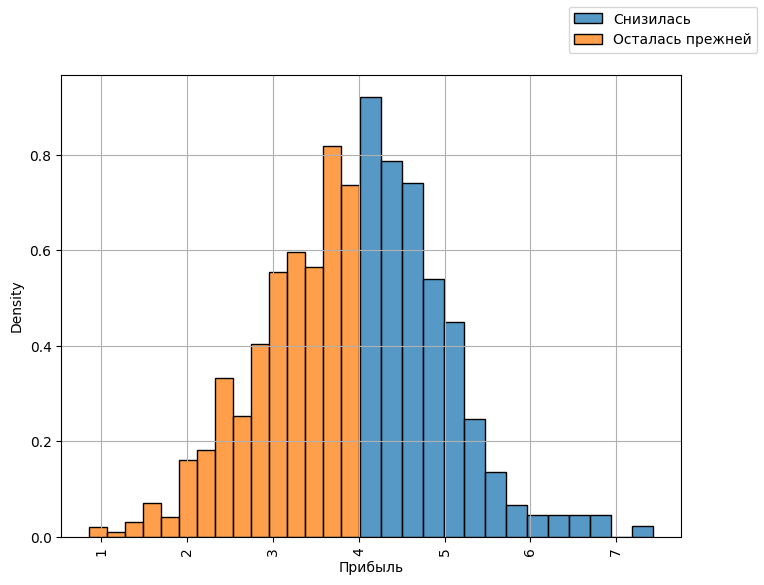

In [88]:
discr_columns = ['Тип сервиса', 'Разрешить сообщать', 'Популярная_категория', 'Маркет_актив_6_мес', 'Маркет_актив_тек_мес']
cont_columns=segment_data_1.columns.drop(['id', 'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать', 'Популярная_категория', 'Маркет_актив_6_мес', 'Маркет_актив_тек_мес'])
for x in cont_columns:
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.histplot(data=segment_data_1, ax=ax, x=x, label='Снизилась', stat='density', common_norm=False)
    sns.histplot(data=segment_data_0, ax=ax, x=x, label='Осталась прежней', stat='density', common_norm=False)
    plt.grid(True)
    plt.figlegend()
    plt.xticks(rotation=90)
    plt.show()

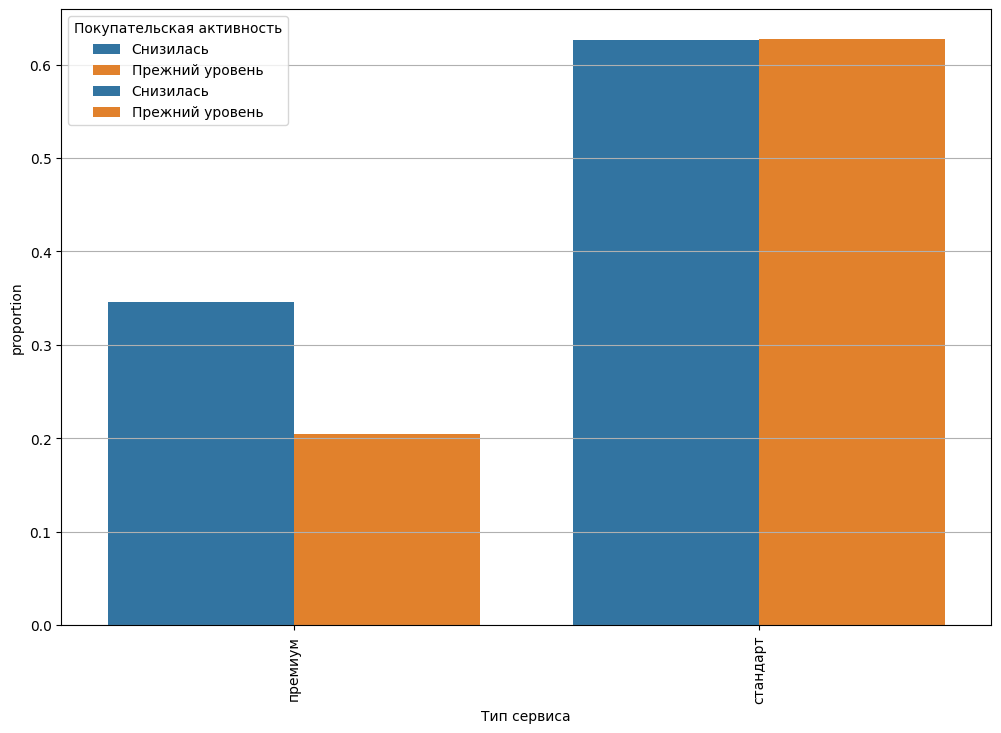

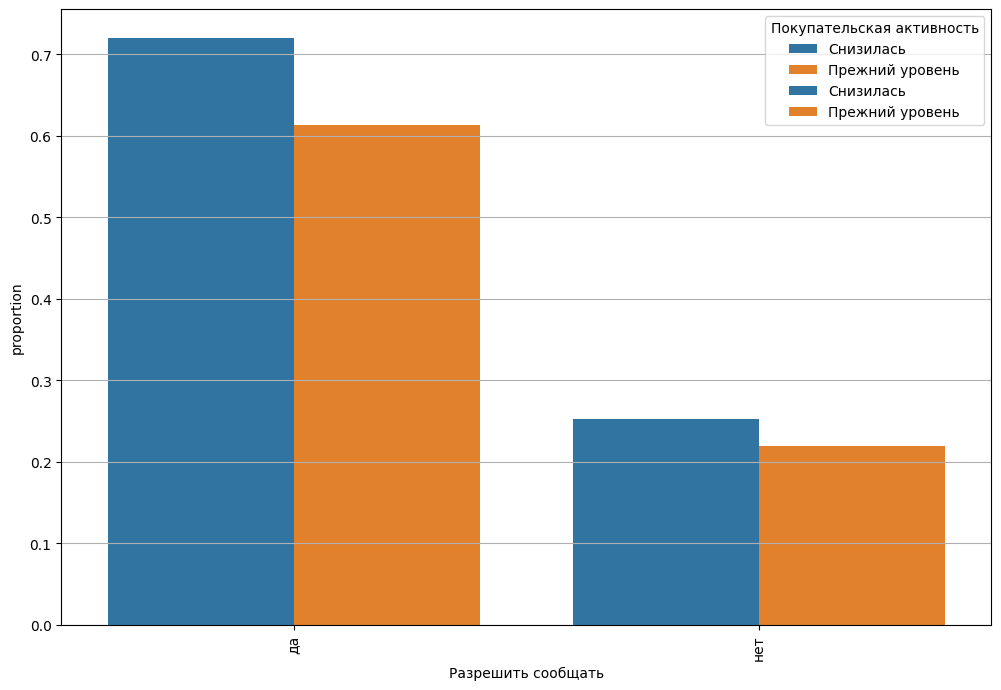

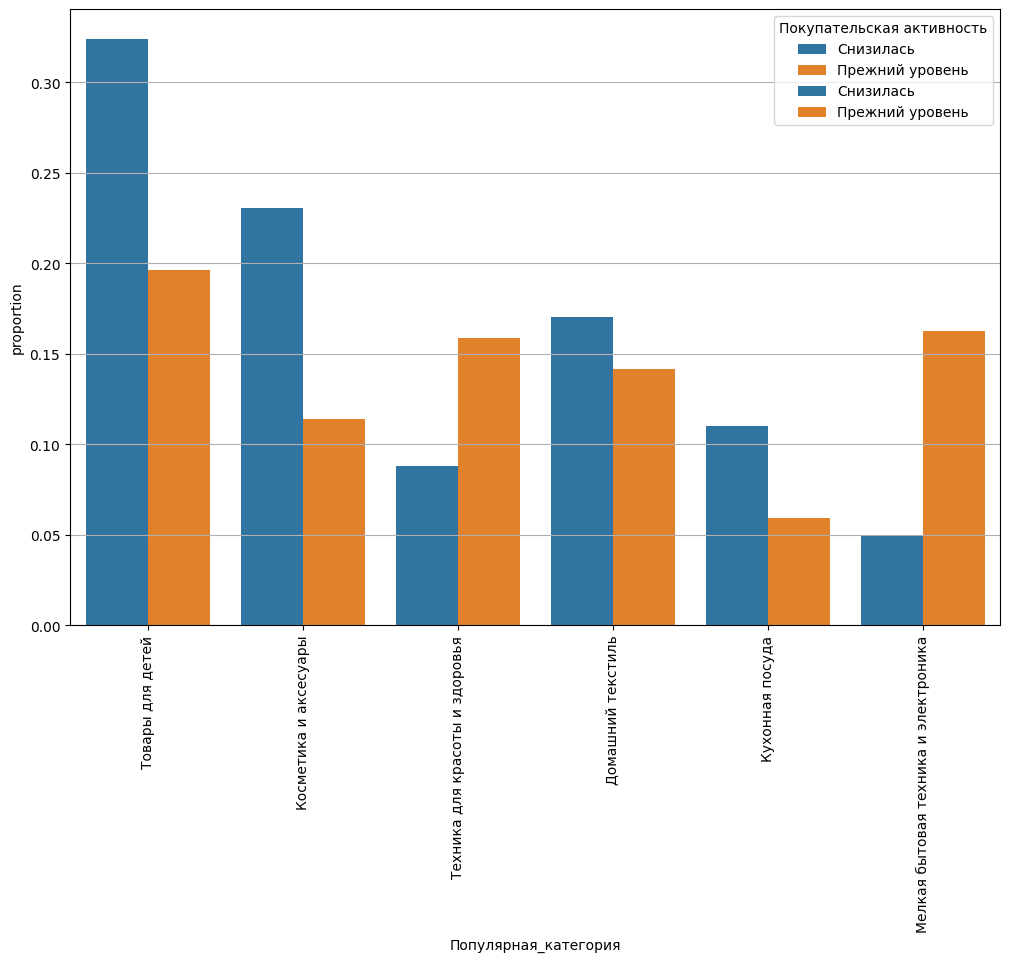

In [89]:
discr_columns = ['Тип сервиса', 'Разрешить сообщать', 'Популярная_категория']
for x in discr_columns:
    fig, ax = plt.subplots(figsize=(12, 8))
    plt.grid(True)
    sns.countplot(data=segment_data_1, ax=ax, x=x, hue='Покупательская активность', stat='proportion')
    sns.countplot(data=segment_data_0, ax=ax, x=x, hue='Покупательская активность', stat='proportion')
    plt.xticks(rotation=90)
    plt.show()

**Вывод:**

Нам важно рассмотреть первый сегмент покупателей и дать для них рекомендации.

На полученных графиках видно, что 1 сегмент покупателей покупает большее количество товарова по акции, но реже, просматривает меньше категорий за визит, страниц и в целом меньше проводит времени на сайте. Также у первой категории больше неоплаченных товаров в корзине.

На основе этих выводов можно дать следующие рекомендации:
1. Чаще отправлять рассылки таким покупателем, попробовать настроить рекламу для них
2. Присылать напоминания о неоплаченных покупках в корзине
3. Возможно сделать более удобной навигацию по сайту, добавить перекрестные ссылки, чтобы пользователи просматривали больше страниц за визит.

На основе графиков можно выделить еще несколько категорий и поработать отдельно с ними. Например среди пользователей с подпиской "премиум" снижение активности заметно сильнее, чему пользователей с обычной подпиской.

Если посмотреть на популярные категории, улучшение ситуации заметно только для категорий "Техника для красоты и здоровья" и "Мелкая бытовая техника и электроника". Остальные категории можно рассмотреть подробнее и выяснить почему покупательская активность в них снизилась.

##  Общий вывод

В данном проекте я выполнила следующие шаги:
* **Выполнила предобработку данных:** 
    * Исправила синтаксические ошибки
    * Привела столбцы к правильному типу данных
    * Обработала дубликаты, аномальных значений и пропусков в данных не обнаружено.
    
* **Провела исследовательский анализ данных:**
    * В целевом признаке есть дисбаланс классов, учитывала это при обучении модели
    * Построила гистограммы и boxplot
    * Отобрала активных клиентов
    * Объединила таблицы

* **Провела корреляционный анализ данных:**
    * Построила тепловую карту и рассчитала коэффицианты корреляции; 
    * Мультиколлинеарность не была обнаружена.


* **Моей задачей была задача бинарной классификациии. Используя пайплайны я обучила 4 модели с помощью**
    * метода ближайших соседей
    * дерева решений
    * логистической регрессии
    * метода опорных векторов

Для оценки качества модели использовала метрику ROC-AUC, так как присутсвует дисбаланс класснов, а также метрику recall, так как нам надо не пропустить объекты класса 1. Лучше моделью стала KNeighborsClassifier с количеством ближайших соседей - 40.

roc_auc = 0.91
recall = 0.81

Подбор моделей был оправдан, я проверила это на константной модели

* **Проанализировала важность признаков**

Больше на предсказание модели влияют такие признаки, как количество страниц за визит, акционные покупки, время, проведенное на сайте в предыдущем и текущем месяцах, есть признаки, которые совсем не влияют на предсказания модели: Популярные категории и выручка за текущий месяц. 

Высокие значение признака количество страниц за визит увеличивают вероятность принадлежности активности клиента к классу "Понизился", та же самая ситуация с признаками "время, проведенное на сайте в предыдущем и текущем месяце". Это сложно интерпертировать, возможно стоит предлагать клиентам товары, которые они чаще всего покупают, чтобы они меньше проводили времени на сайте и сразу видели товары, которые им нужны.

Влияние признака "Акционные товары" интерпертировать проще. Высокие значения этого признака увеличивают вероятность принадлежности активности клиента к классу "Остался на прежнем уровне". Клиентам нравятся акционные предложение и стоит увеличить их количество и предлагать клиентам.

* **Выполнила сегментацию покупателей**

Я работала с группой покупателей, у которых прибыль которых за последние три месяца больше четырех, вероятность снижения покупательской активности больше 0,7

Выяснилось, что сегмент сегмент покупателей покупает большее количество товарова по акции, но реже, просматривает меньше категорий за визит, страниц и в целом меньше проводит времени на сайте. Также у первой категории больше неоплаченных товаров в корзине..

* **Рекомендации**

На основе проведенного анализа можно дать следующие рекомендации:
1. Чаще отправлять рассылки таким покупателем, попробовать настроить рекламу для них
2. Присылать напоминания о неоплаченных покупках в корзине
3. Возможно сделать более удобной навигацию по сайту, добавить перекрестные ссылки, чтобы пользователи просматривали больше страниц за визит.
4. Добавить больше акционных товаров, чаще проводить акции, они больше всего влияют на покупательскую способность всех групп клиентов.